# K-means - Clustering algorithm

** not to be confused with k-nearest neighbours **

* K-means is a clustering algorithm that tries to partition a set of points into K sets (clusters) such that the points in each cluster tend to be near each other. It is unsupervised because the points have no external classification

* K-nearest neighbors is a classification (or regression) algorithm that in order to determine the classification of a point, combines the classification of the K nearest points. It is supervised because you are trying to classify a point based on the known classification of other points.

# Notes on k-means clustering

* The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.

** In basic terms, the algorithm has three steps **

* The first step chooses the initial centroids, with the most basic method being to choose k samples from the dataset X

* After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid

* The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid

* The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

** source: http://scikit-learn.org/stable/modules/clustering.html#k-means **

* _note_: 
    * Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids
    * One method to help address this issue is the k-means++ initialization scheme, which has been implemented in scikit-learn (use the init='k-means++' parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization, as shown in the reference.

** workshop code starts here **

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [5]:
X = iris.data
Y = iris.target

In [13]:
print(Y.shape)
print(Y)
print(iris.target_names)

print(X[0])
print(iris.feature_names)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
[ 5.1  3.5  1.4  0.2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


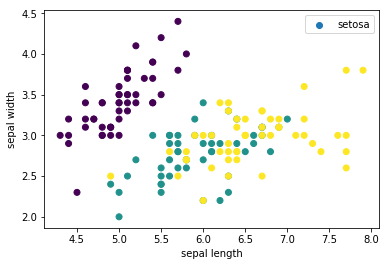

In [25]:
plt.scatter(X[:,0], X[:,1], c=Y)

plt.xlabel('sepal length')
plt.ylabel('sepal width')

names = iris.target_names
plt.legend(names)

In [26]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([0], dtype=int32)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

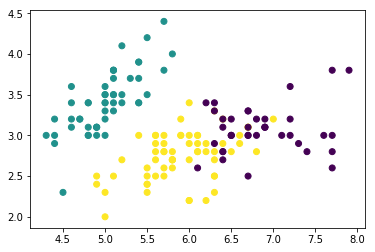

In [38]:
y_pred = kmeans.predict([[1, 1, 20, 2]])

orig_pred = kmeans.predict(X)

display(y_pred)
display(orig_pred)

plt.scatter(X[:, 0], X[:, 1], c=orig_pred)

In [35]:
print(kmeans.cluster_centers_)

[[ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.006       3.418       1.464       0.244     ]
 [ 5.9016129   2.7483871   4.39354839  1.43387097]]


** workshop code ends here **

# vector quantization using k-means

<img src='quantized.png'> <img src='true_image.png'>

In [2]:
# import clustering methods

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [4]:
# cluster the original colors in the image into only 64 clusters
n_colors = 64

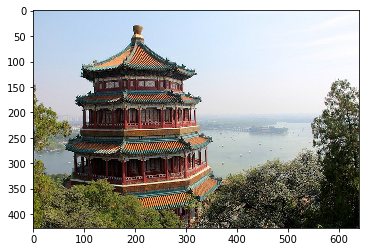

In [5]:
org_china = load_sample_image('china.jpg')

# original image
plt.imshow(org_china)

In [6]:
china = np.array(org_china, dtype=np.float64) / 255

In [7]:
w, h, d = original = tuple(china.shape)

print(w, h, d, original)

427 640 3 (427, 640, 3)


In [8]:
image = np.reshape(china, (w * h, d))

print(image.shape)

(273280, 3)


In [9]:
# fit the model on 1000 data only and predict for whole image

shuffled_array = shuffle(image, random_state=0)[:1000]

kmeans = KMeans(n_clusters=n_colors, random_state=0)
kmeans.fit(shuffled_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [10]:
# predict for the whole image

labels = kmeans.predict(image)

print(labels)
print(labels.shape)

[62 62 62 ...,  1  6  6]
(273280,)


In [11]:
# function to recreate the image i.e. compressed one

# labels - clusters
# codebook - location of final centroid in the image
# (w, h) - size of image

def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    label_idx = 0
    image = np.zeros((w, h, d))
    
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
            pass
        pass

    return image

In [23]:
# cluster centers of k-means

print(kmeans.cluster_centers_[2])
print(kmeans.cluster_centers_.shape)

print(labels[1000])
print(kmeans.cluster_centers_[labels[1000]])
print(kmeans.cluster_centers_[labels[1000]].shape)

[ 0.82063983  0.89896801  0.98462332]
(64, 3)
2
[ 0.82063983  0.89896801  0.98462332]
(3,)


(427, 640, 3)


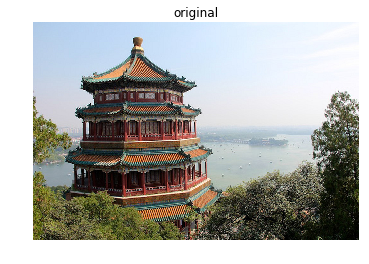

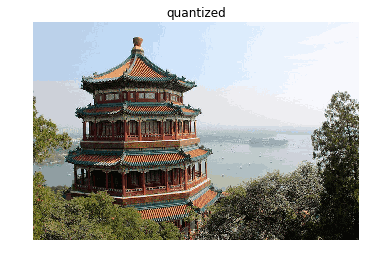

In [27]:
# get the recreated image

plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('original')
plt.imshow(org_china)

plt.figure(2)
plt.clf()      # clear the figure
plt.axis('off')
plt.title('quantized')

image = recreate_image(kmeans.cluster_centers_, labels, w, h)
print(image.shape)

plt.imshow(image)